In [154]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

sns.set_theme()


In [193]:
df = pd.read_csv("house_pricing/train.csv")
y = df["SalePrice"]
X = df.drop(["SalePrice", "Id"],axis=1)
nan_count = X.isna().sum()/X.shape[0]
# np.percentile(nan_count,95)
# X = X[X.columns[nan_count < 0.9]]
very_num_cols = X._get_numeric_data().columns
categorical_cols = list(set(X.columns) - set(very_num_cols))
# X = X.drop(s[s].index, axis=1)
X = pd.get_dummies(X, columns=categorical_cols)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<AxesSubplot:>

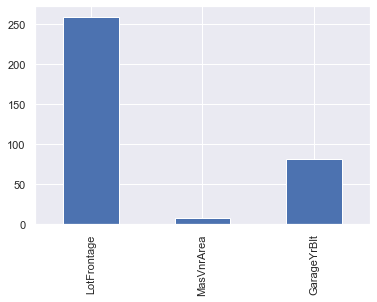

In [188]:
X[X.columns[X.isna().sum() > 0]].isna().sum().plot(kind='bar')

In [189]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [190]:
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [191]:
from sklearn import metrics
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [192]:
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))

-60835805282.97668
4.466194553264886e+20
